In [350]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.manifold import SpectralEmbedding
from scipy.linalg import svd
from sklearn.preprocessing import scale

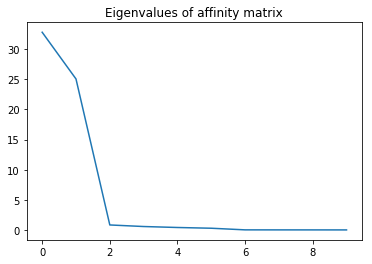

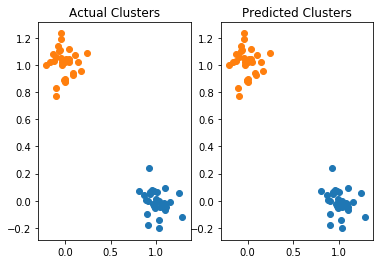

In [351]:
## Test example of spectral clustering

# Create two distributions with same covariance and different means
mean1 = np.array([1.,0.])
mean2 = np.array([0.,1.])
cov = np.array([[0.01,0.],[0.,.01]])
a = np.random.multivariate_normal(mean1, cov, 30)
b = np.random.multivariate_normal(mean2, cov, 30)

# Construct adjacency matrix
data = np.vstack((a,b))
nClusters = 2
m = SpectralClustering(n_clusters=nClusters,affinity='rbf')
m.fit(data)
y = m.fit_predict(data)

# Compute eigenvalues and eigenvectors of affinity matrix
eigenval, eigenvect = np.linalg.eig(m.affinity_matrix_)

# Plot eigenvalues
plt.plot(eigenval[:10])
plt.title('Eigenvalues of affinity matrix')
plt.show()

# Display actual clusters
plt.subplot(121)
plt.title('Actual Clusters')
plt.scatter(a[:,0],a[:,1])
plt.scatter(b[:,0],b[:,1])

plt.subplot(122)
# Plot predicted clusters
for i in range(nClusters):
    plt.scatter(data[y==i][:,0],data[y==i][:,1])
plt.title('Predicted Clusters')
plt.show()

In [352]:
# Load video
video = np.load('video1.npz')['video']
numFrames,height,width,RGB = video.shape

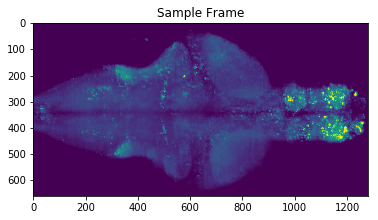

In [353]:
# Convert to grayscale to reduce computation time
video = np.mean(video,axis=3)

# Display sample frame
plt.imshow(video[20,:,:])
plt.title('Sample Frame')
plt.show()

# Reshape each frame into a column vector
video = np.reshape(video,(numFrames,height*width))

In [354]:
window = 10
overlap = int(0.75*window)

numWindows = int(1 + (numFrames - window)/overlap)
windows = np.array([video[i*overlap:i*overlap+window,:].flatten() for i in range(numWindows)])

In [ ]:
## A brief analysis using SVD
# Not really relevant


# Center each sample (frame) and scale to unit variance
#scale(windows,axis=0,with_mean=False, with_std=True, copy=False)
u,s,vt = svd(windows,full_matrices=False)

# Plot of singular value spectrum spectrum
plt.plot(s)
plt.show()

# First 2 columns of U in the SVD decomposition of video
# This corresponds to the projection of the data along the first 2 
# directions of maximum variance
plt.scatter(u[:,0],u[:,1])
plt.xlabel(r'$U_1$')
plt.xlabel(r'$U_2$')
plt.show()

In [ ]:
# Perform spectral clustering with RBF kernel
# gamma tuned 1e-10 so that off diagonal elements are nonzero
m = SpectralClustering(affinity='rbf',gamma = 1e-10)
m.fit(windows)

In [ ]:
# Plot eigenvalues and eigenvectors of affinity matrix
# For some reason thi
eigenval, eigenvect = np.linalg.eig(m.affinity_matrix_)

# Sort eigenvalues in decreasing order
indices = np.argsort(eigenval)[::-1]
eigenval = eigenval[indices]
eigenvect = eigenvect[:,indices]

plt.subplot(121)
plt.plot(eigenval)
# Exclude the first eigenvalue
#plt.xlabel('Exclude 1st eigenvalue')
plt.subplot(122)
plt.semilogy(eigenval)


plt.suptitle('Eigenvalues of Affinity Matrix')
plt.show()



# Plot data projected onto first two eigenvectors
plt.scatter(eigenvect[:,0],eigenvect[:,1])
plt.title('Projection onto first 2 eigenvectors')
plt.show()

In [ ]:
# Plot of affinity matrix
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.imshow(m.affinity_matrix_- np.eye(len(m.affinity_matrix_)))
cax = ax.matshow(m.affinity_matrix_)
fig.colorbar(cax)
plt.title('Affinity Matrix \n')
plt.show()